In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitter_training.csv', header=None)

In [3]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.columns = ['ID', 'Game', 'Sentiment', 'Tweet']

In [9]:
df.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df['Game'].value_counts()

Game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

# Data Preprocessing

In [59]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.preprocessing import LabelEncoder

In [15]:
#Basic Cleaning function
def clean_text(text):
    if isinstance(text, str): #Check if text is astring
      text = re.sub(r'http\S+', '', text)  # Remove URLs
      text = re.sub(r'@\w+', '', text)     # Remove Mentions
      text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove Special Characters
      text = text.lower()  # Convert to lower case
    return text

#Handling missing values by filling with empty string
df['Tweet'] = df['Tweet'].fillna(' ')
#Converting all values in 'Tweet' column to strings
df['Tweet'] = df['Tweet'].astype(str)
#Apply cleaning to the tweet column
df['Cleaned_tweet'] = df['Tweet'].apply(clean_text)
df.head()

,ID,Game,Sentiment,Tweet,Cleaned_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [16]:
df.isnull().sum()

ID               0
Game             0
Sentiment        0
Tweet            0
Cleaned_tweet    0
dtype: int64

# Exploratory data Analysis

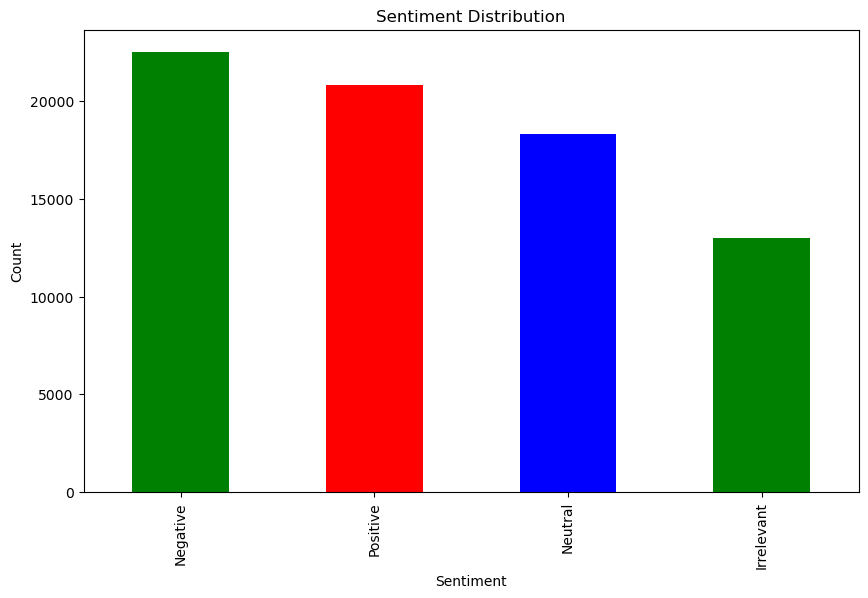

In [18]:
#Visualizing sentiment distribution
plt.figure(figsize=(10,6))
df['Sentiment'].value_counts().plot(kind='bar',color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Cloud for positive and negative tweets

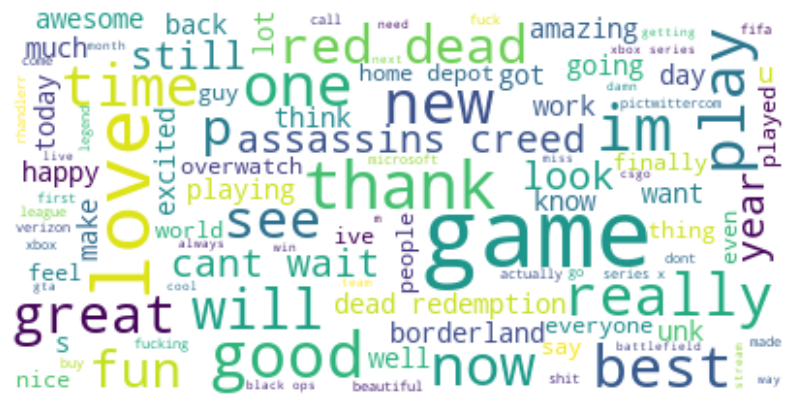

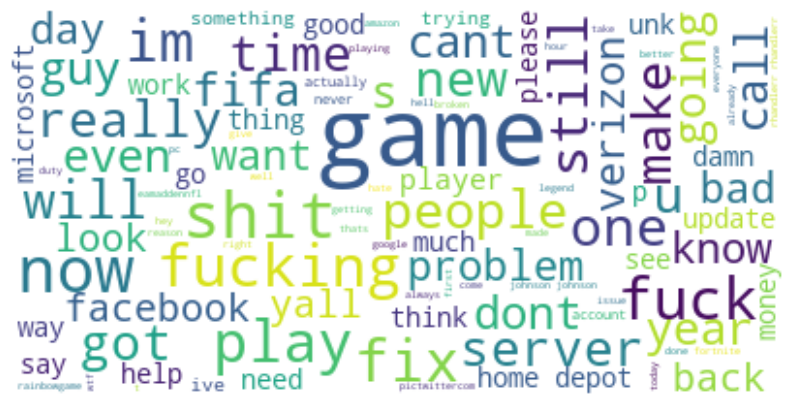

In [20]:
#WordCloud function
def plot_wordcloud(sentiment):
    text = " ".join(review for review in df[df['Sentiment']==sentiment]['Cleaned_tweet'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
#Plotting WordCloud for positive sentiments
plot_wordcloud('Positive')
#Plotting WordCloud for negative sentiments
plot_wordcloud('Negative')

# Model Building

In [22]:
#Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_tweet']).toarray()
# Ensure X is 2D
print(f"Shape of X: {X.shape}")  # Should be (n_samples, n_features)

#Encoding the target variables
le = LabelEncoder()
y = le.fit_transform(df['Sentiment']) #Encode Positive->1, Negative->0
# Ensure y is 1D
print(f"Shape of y: {y.shape}")  # Should be (n_samples,)
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Building Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Predictions
y_pred = lr.predict(X_test)

#Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Shape of X: (74682, 5000)
Shape of y: (74682,)


C:\Users\atish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.672156390172056


In [63]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

# Model Evaluation

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56      2592
           1       0.71      0.77      0.74      4519
           2       0.61      0.62      0.62      3596
           3       0.69      0.72      0.70      4230

    accuracy                           0.67     14937
   macro avg       0.67      0.65      0.66     14937
weighted avg       0.67      0.67      0.67     14937

Confusion matrix:
 [[1278  468  388  458]
 [ 194 3488  473  364]
 [ 264  547 2245  540]
 [ 235  412  554 3029]]


<Figure size 1000x600 with 0 Axes>

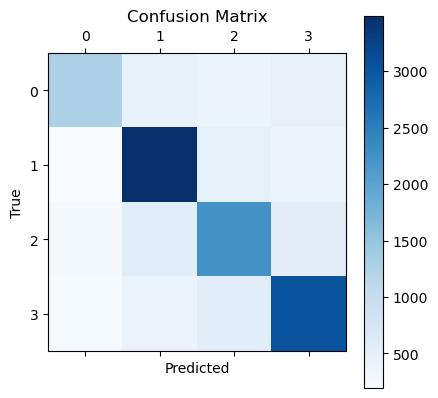

In [24]:
#Classification report
print("Classification report:\n", classification_report(y_test, y_pred))
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

#Confusion matrix plot
plt.figure(figsize=(10,6))
plt.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualizing Model performance

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

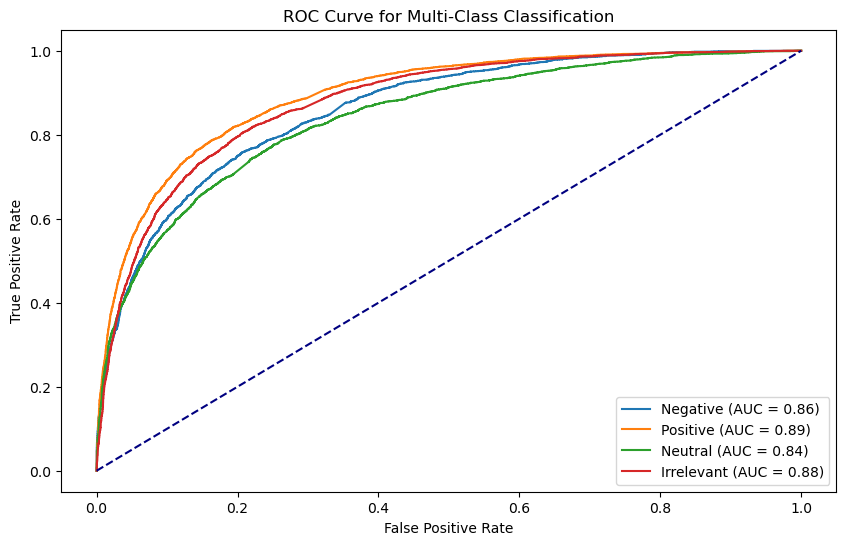

In [73]:
#Binarizing the output (one-hot encoding)

# Define class label mapping
class_mapping = {0: "Negative", 1: "Positive", 2: "Neutral", 3: "Irrelevant"}
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

#Training the Logistic Regression model with OneVsRest Strategy
lr_ovr = OneVsRestClassifier(LogisticRegression())
y_prob = lr_ovr.fit(X_train, y_train_bin).predict_proba(X_test)

#Computing The ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plotting ROC Curve for each class
plt.figure(figsize=(10,6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'{class_mapping [i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
#Evaluating the model_rf
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      2592
           1       0.87      0.91      0.89      4519
           2       0.84      0.88      0.86      3596
           3       0.87      0.89      0.88      4230

    accuracy                           0.87     14937
   macro avg       0.88      0.86      0.87     14937
weighted avg       0.88      0.87      0.87     14937

Accuracy:  0.8734016201379126


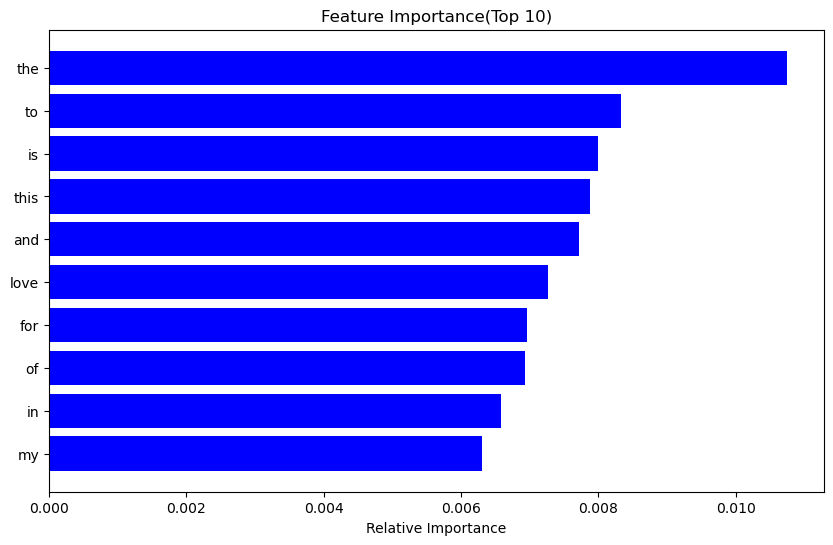

In [87]:
#Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]   #Top 10 important features

#Plotting Feature importances
plt.figure(figsize=(10,6))
plt.title('Feature Importance(Top 10)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [tfidf.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Gradient Boosting (XGBoost)
XGBoost is a powerfull boosting techniques that iteratively build decesion trees, focusing on correcting the mistakes of previous iterations 

In [95]:
import xgboost as xgb
#Converting the datset to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
#Setting Parameters for XGBoost
params = {
    'objective' : 'multi:softmax', #Multiclass classification
    'num_class' : 4,
    'max_depth' : 6,
    'eta' : 0.3,
    'eval_metric' : 'mlogloss'
}
#Training the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

#Making Predictions
y_pred_xgb = xgb_model.predict(dtest)

#Evaluating the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48      2592
           1       0.63      0.79      0.70      4519
           2       0.59      0.61      0.60      3596
           3       0.68      0.68      0.68      4230

    accuracy                           0.64     14937
   macro avg       0.66      0.61      0.62     14937
weighted avg       0.65      0.64      0.63     14937

